# Model a Snail - A simple Neural Network

### Python Future imports for compatibility with python2

In [3]:
import sys

from __future__ import print_function, division

In [4]:
!pip install keras

    100% |################################| 327kB 2.1MB/s ta 0:00:01
    100% |################################| 256kB 2.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/2c/f7/79/13f3a12cd723892437c0cfbde1230ab4d82947ff7b3839a4fc
Successfully built pyyaml


### Import Keras, and other necessary libraries

In [5]:
%matplotlib inline


import tensorflow
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout
from keras import  optimizers

import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

Using TensorFlow backend.


### Version Check

In [6]:
print("Keras " , keras.__version__)
print("tensorflow, ", tensorflow.__version__)
print("python", sys.version)

Keras  2.1.3
tensorflow,  1.4.1
python 3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


# Load the Data - Snail has 2 features, to decide to eat or not

In DSX, loading data from Hadoop / DB / File is a 1-click effort

In [8]:
import pandas as pd
df_data_2 = pd.read_csv('snail_experiment_10000.csv')
df_data_2.head()


,hunger,food,action
0,0.054849,0.996620,pass
1,0.170089,0.795212,eat
2,0.767761,0.754398,eat
3,0.360207,0.571926,pass
4,0.017384,0.630184,pass


In [9]:
snail_data = df_data_2

### A hungry signal, and a food-within-range signal, will decide if the Snail will eat

In [10]:
snail_data.head(5)

,hunger,food,action
0,0.054849,0.996620,pass
1,0.170089,0.795212,eat
2,0.767761,0.754398,eat
3,0.360207,0.571926,pass
4,0.017384,0.630184,pass


# Create Test and Train set

In [11]:
msk = np.random.rand(len(snail_data)) < 0.8

train = snail_data[msk]
test = snail_data[~msk]

In [12]:
# data preprocessing
Y_train = to_categorical( 1 * (train["action"] == "eat") )
Y_test = to_categorical( 1 * (test["action"] == "eat") )
X_train = train[["hunger","food"]].values
X_test = test[["hunger","food"]].values

# Jupyter Notebooks can live Plot - This code is to live see the training curve

In [13]:
# updatable plot
# a minimal example (sort of)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure()
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

# Here we design our Neural Network, and select optimizer with Learning Rate

- Change the learning rate to see the effect.
- Add a few more layers
- Change the activation function

In [14]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))

sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.layers[0].get_weights()

[array([[ 0.32090342,  0.91317213],
        [-0.01083827, -0.53165609]], dtype=float32),
 array([ 0.,  0.], dtype=float32)]

# The actual training happens with the fit() 

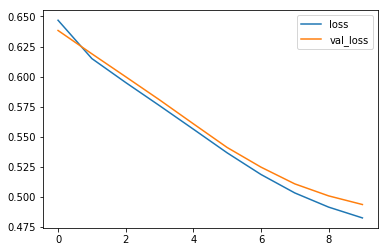

In [16]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)

# We can now use our trained network to check some cases

### Snail is very hungry, but food is out of reach

In [17]:
model.predict_classes( np.array([[1,  .1]]) , verbose=1)

1/1 [==============================] - 0s 7ms/step


array([1])

### Snail is not that hungry, but food is within reach

In [18]:
model.predict_classes( np.array([[.55,  .9]]) , verbose=1)

1/1 [==============================] - 0s 635us/step


array([0])

### Snail is not hungry, food is below him

In [19]:
model.predict_classes( np.array([[.3,  1.0]]) , verbose=1)

1/1 [==============================] - 0s 499us/step


array([0])